### Groupe : 
- HANNACHI ourida
- ALTUNAY DANIEL
- CHENNOUFI SOHEIB
- ZEROUALI ILHAM

# clara clustering : 

L'algorithme k-means est un des algorithmes de science des données les plus simples, chaque scientifique des données doit l'avoir dans sa boîte à outils. Cependant, il a ses limitations.

## les inconvénient de kmeans : 
k-means : 
- Ne fonctionne pas correctement lorsque les clusters diffèrent en taille et en densité, prédire le nombre précis de centroïdes pour diviser les données devient difficile. 
-Le placement initial du k-centroid a tendance à affecter le résultat. 
-Le centroïde est un point imaginaire dans l'ensemble de données, il peut donc avoir moins de sens. 
-Sensible à l'échelle des dimensions, le redimensionnement des données peut donc devenir difficile. 
- Utilise la distance euclidienne tout en divisant les points. Cependant, cela peut devenir inefficace dans une configuration de grande dimension puisque tous les points deviennent également éloignés les uns des autres. 
- L'algorithme divise l'espace même lorsque la partition n'a pas de sens.

De nombreux variants de K-means ont vu le jour, ces variants ont pour objectifs d'améliorer l'algorithme. Les variants peuvent utiliser une distance arbitraire, il utilise pas toujours la distance euclidienne. Parmis les algorithms qui ont vu le jour on a K-medoid (PAM), CLARA et aussi CLARANS. K-medoids est variant de K-means où le point central du cluster doit faire partie des données. 



En résumé, un nombre k de medoids est aléatoirement choisi et chaque élément des données est attribué au medoid dont il est le plus proche. Ensuite, de manière itérative l’algorithme choisi les meilleurs medoids.




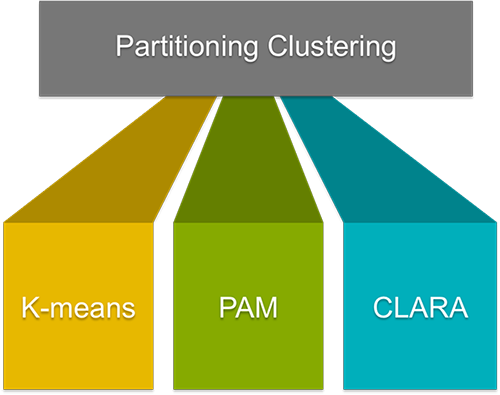

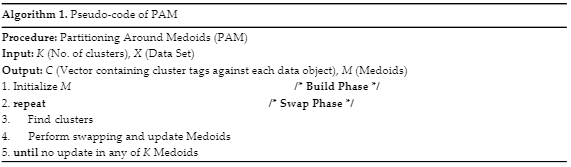

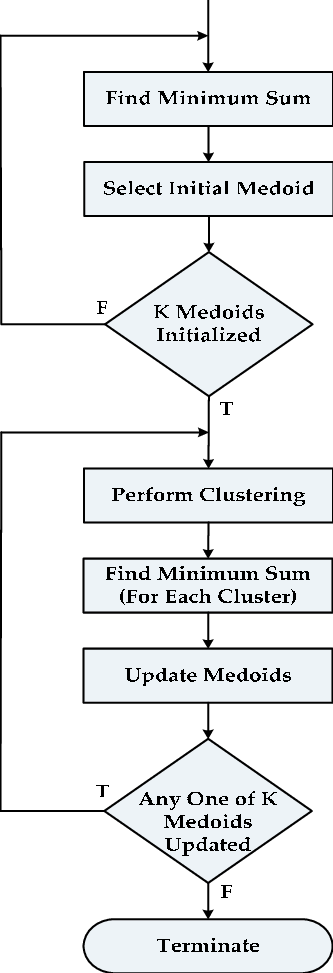

K-medoids a pour avantage de ne pas être sensible au bruit, et les centroides ont du sens étant donné qu'ils font parti des données initiales. Cependant, il a un inconvéniant majeur, il est plus long et demande plus de mémoire que K-means ceci est problématique spécialement pour les larges bases de données. Un autre variant est donc nécéssaire.

Clara (Clustering LARge Applications) est un algorithme de Clustering, c’est une extension de l’algorithme K-medoids utilisé pour traiter de grandes quantités de données. 


1.	L’algorithme CLARA divise les données initiales en plusieurs sous-ensemble de taille fixe.
2.	L’algorithme PAM est appliqué sur chaque sous-ensemble et k medoids sont choisi. 
3.	Chaque point des données initiales est associé à un des medoids. 
4.	Les dissimilarités pour l’ensemble des données sont ensuite calculées et les meilleurs medoids sont retenus. 

L’avantage principal de Clara est qu’il réduit le temps de calcul quand on a beaucoup de données.

L’algorithme CLARA a été appliqué sur des images de globules blancs de 4 classes. 

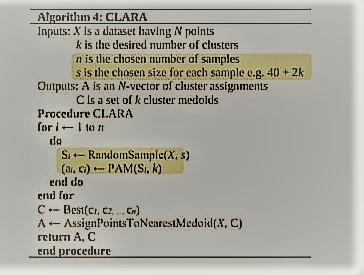

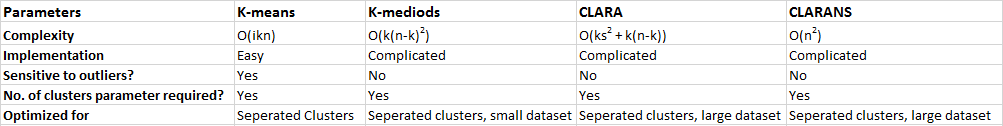

# Introduction des données
La reconnaissance fiable des globules blancs malins est une étape clé dans le diagnostic des hémopathies malignes telles que la leucémie myéloïde aiguë. Microscopique
l'examen morphologique des cellules sanguines est généralement effectué par des humains entraînés
examinateurs, ce processus est fastidieux, chronophage et difficile à standardiser.

# interprétation des données : 
L'ensemble de données morphologiques de la LMA contient 3896 + 1044 images unicellulaires étiquetées par des experts provenant de frottis sanguins périphériques de plusieurs patients diagnostiqués avec une leucémie myéloïde aiguë à l'hôpital, ainsi que des patients sans signes de malignité hématologique. 
L'acquisition d'images a été effectuée à l'aide d'un microscope/scanner numérique  avec un grossissement optique de 100 fois. Les leucocytes pathologiques et non pathologiques ont été classés dans un schéma de classification morphologique standard dérivé de la pratique clinique par des experts qualifiés. Pour quantifier la variabilité inter- et intra-évaluateur des examinateurs.
pour notre étude on a utilisé juste une partie de cette base on a utilisé que 4 classes parmi 12 qui sont : Eosinophile, Lymphocytes, Monocyte et Neutrophile.
chaque image est associée une etiquette unique (sa classe) et comprend un seul globule blanc.
notre base de données est divisée sur deux, la première contient 1044 individus et la deuxième est trés large avec 3896 indivius.
Notre approche consiste à classer les 4 types de cellules en utilisant deux algorithmes de clustering : Kmeans et Clara.
Ce Notebook concerne la comparaison du clustering K-Means et du clustering CLARA sur l'ensemble de données LMA, qui utilisent respectivement la distance euclidienne et la distance de Manhattan comme mesure de dissimilarité. 

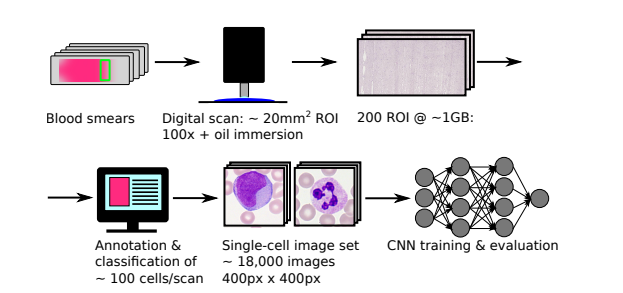

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!unzip '/content/drive/My Drive/Clara_project/train_L.zip'
#drive/My\ Drive/data/train.zip

Archive:  /content/drive/My Drive/Clara_project/train_L.zip
  inflating: train/EOS0.tiff         
  inflating: train/EOS1.tiff         
  inflating: train/EOS10.tiff        
  inflating: train/EOS100.tiff       
  inflating: train/EOS101.tiff       
  inflating: train/EOS102.tiff       
  inflating: train/EOS103.tiff       
  inflating: train/EOS104.tiff       
  inflating: train/EOS105.tiff       
  inflating: train/EOS106.tiff       
  inflating: train/EOS107.tiff       
  inflating: train/EOS108.tiff       
  inflating: train/EOS109.tiff       
  inflating: train/EOS11.tiff        
  inflating: train/EOS110.tiff       
  inflating: train/EOS111.tiff       
  inflating: train/EOS112.tiff       
  inflating: train/EOS113.tiff       
  inflating: train/EOS114.tiff       
  inflating: train/EOS115.tiff       
  inflating: train/EOS116.tiff       
  inflating: train/EOS117.tiff       
  inflating: train/EOS12.tiff        
  inflating: train/EOS13.tiff        
  inflating: train/EOS14.tif

In [47]:

!unzip '/content/drive/My Drive/Clara_project/train.zip'
#drive/My\ Drive/data/train.zip

Archive:  /content/drive/My Drive/Clara_project/train.zip
  inflating: train/EOS0.tiff         
  inflating: train/EOS1.tiff         
  inflating: train/EOS10.tiff        
  inflating: train/EOS100.tiff       
  inflating: train/EOS101.tiff       
  inflating: train/EOS102.tiff       
  inflating: train/EOS103.tiff       
  inflating: train/EOS104.tiff       
  inflating: train/EOS105.tiff       
  inflating: train/EOS106.tiff       
  inflating: train/EOS107.tiff       
  inflating: train/EOS108.tiff       
  inflating: train/EOS109.tiff       
  inflating: train/EOS11.tiff        
  inflating: train/EOS110.tiff       
  inflating: train/EOS111.tiff       
  inflating: train/EOS112.tiff       
  inflating: train/EOS113.tiff       
  inflating: train/EOS114.tiff       
  inflating: train/EOS115.tiff       
  inflating: train/EOS116.tiff       
  inflating: train/EOS117.tiff       
  inflating: train/EOS12.tiff        
  inflating: train/EOS13.tiff        
  inflating: train/EOS14.tiff 

# import libraries:

In [68]:
import time

In [3]:
import os 
import cv2 

import numpy as np 
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [4]:
path = "/content/train"


In [48]:
path2 = "/content/train2"

In [50]:
os.chdir(path)

### prétraitement des données:

In [58]:
# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
for files in os.listdir(path):
  if files.endswith('tiff'):
    images.append(files)
                        

In [60]:
print('on au total :', len(images))

on au total : 3896


In [9]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553476096/553467096 [==============================] - 7s 0us/step


In [10]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    #print(reshaped_img.shape)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   




In [61]:
data = {}


In [62]:
# lop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
          print('-----')
          pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
print(feat.shape)
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)


(3896, 1, 4096)


In [63]:
feat.shape

(3896, 4096)

In [64]:

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)


In [66]:
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",pca.explained_variance_ratio_*100)
    print("pourcentages d'inertie cumulées:\n",np.cumsum(pca.explained_variance_ratio_)*100)

pourcentages d'inertie :
 [ 18.205  11.361   8.231   6.121   3.529   3.354   2.969   2.512   2.249
   1.411   1.384   1.291   1.238   1.166   0.966   0.953   0.899   0.865
   0.816   0.779   0.768   0.704   0.680   0.637   0.621   0.591   0.545
   0.524   0.468   0.459   0.440   0.422   0.411   0.395   0.379   0.354
   0.334   0.324   0.317   0.307   0.295   0.285   0.276   0.266   0.261
   0.252   0.245   0.239   0.224   0.222   0.215   0.207   0.202   0.198
   0.189   0.187   0.178   0.176   0.164   0.159   0.157   0.149   0.148
   0.146   0.142   0.137   0.136   0.134   0.126   0.124   0.123   0.122
   0.120   0.118   0.117   0.114   0.109   0.107   0.106   0.105   0.103
   0.099   0.098   0.096   0.093   0.092   0.089   0.088   0.087   0.084
   0.083   0.082   0.079   0.077   0.076   0.075   0.074   0.072   0.072
   0.071]
pourcentages d'inertie cumulées:
 [ 18.205  29.567  37.797  43.918  47.447  50.801  53.770  56.282  58.531
  59.941  61.326  62.616  63.855  65.021  65.987  66.9

In [67]:

print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [69]:

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('flower_labels.csv')
#label = df['label'].tolist()
#unique_labels = list(set(label))
t_i = time.time()
# cluster feature vectors
kmeans = KMeans(n_clusters=4,n_jobs=-1, random_state=22)
kmeans.fit(feat)
t_f = time.time()

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


In [70]:

x_df = pd.DataFrame(x)

x_df['cluster'] = kmeans.fit_predict(x)

kmeans.labels_

array([3, 2, 0, ..., 2, 1, 2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


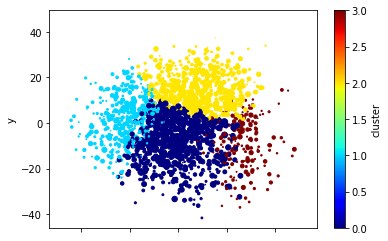

In [71]:
#2D visualization

res = x_df.drop(columns=x_df.columns[3:-1])
res.columns = ['x', 'y', 'z', 'cluster']
res.plot.scatter('x', 'y', 'z', c='cluster', colormap='jet')

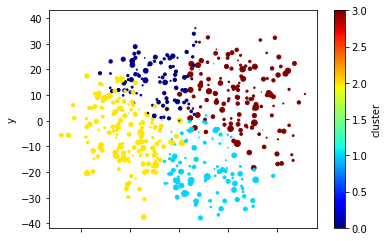

In [74]:
temps_kmean_D1 = t_f - t_i
print('temps pour lexécution de Kmeans sur dataset large est :', temps_kmean_D1)
print('temps pour lexécution de Kmeans sur dataset large est :', 1.51)

temps pour lexécution de Kmeans sur dataset large est : 14.010292530059814
temps pour lexécution de Kmeans sur dataset large est : 1.51


#### projection en 3D de la première dataset :

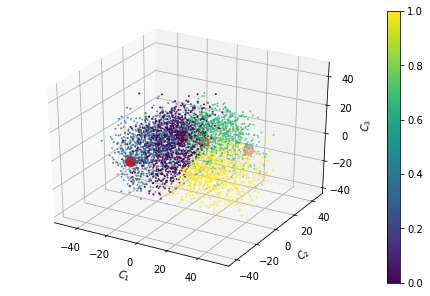

In [75]:
#3D visualization

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget

centroids  = kmeans.cluster_centers_ 
cen_x = [centroid[0] for centroid in centroids]
cen_y = [centroid[1] for centroid in centroids]
cen_z = [centroid[2] for centroid in centroids]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(res.x, res.y, res.z, c=res.cluster, zorder=-1, s=1)
p = ax.scatter(cen_x, cen_x, cen_z, s=100, color='r', zorder=1)


ax.set_xlabel('$C_1$')
ax.set_ylabel('$C_2$')
ax.set_zlabel('$C_3$')

#ax.set_box_aspect((np.ptp(res.x), np.ptp(res.y), np.ptp(res.z)))

fig.colorbar(p, ax=ax)
plt.show()

#### Projection en 3D de la deuxième dataset:

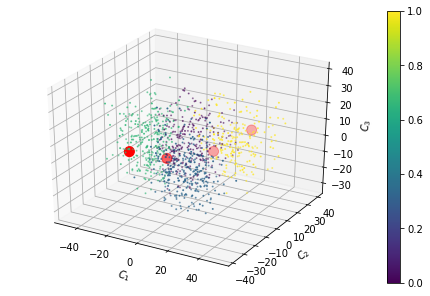

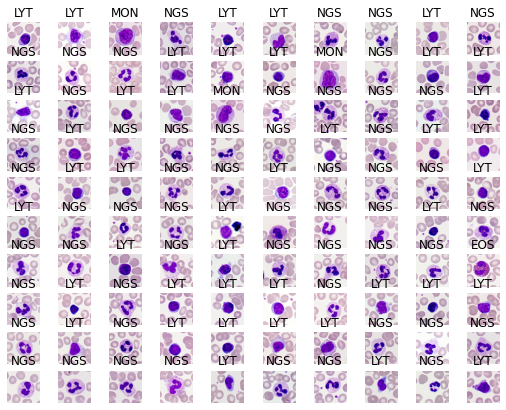

In [57]:
def view_cluster(cluster):
    plt.figure(figsize = (9,7));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 100 images to be shown at a time
    if len(files) > 100:
        files = files[:100]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title(file[:3])
        plt.axis('off')
view_cluster(3)

#### la classification de la small dataset avec Kmeans du meme cluster :

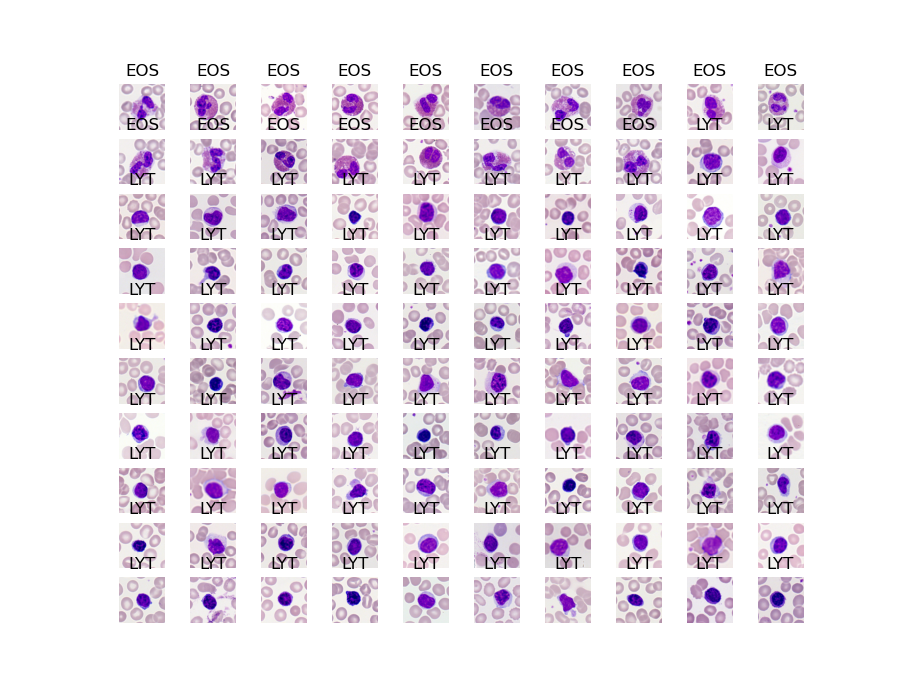

In [101]:
print(35*'*', 'RESULTS', 35*'*')
for cluster_i in range(4):
    scores = {'EOS' : 0, 'LYT' : 1, 'MON' : 2, 'NGS' : 3}
    perc = scores.copy()
    for pic in groups[cluster_i]:
        true_c = pic.split('.')[0][:3]
        scores[true_c] += 1
    n = sum(list(scores.values()))
    for key in scores.keys():
        perc[key] = str(np.round(100*scores[key]/n, 2))+'%'
    print(f'Cluster {cluster_i} :', perc)

*********************************** RESULTS ***********************************
Cluster 0 : {'EOS': '1.36%', 'LYT': '34.87%', 'MON': '8.01%', 'NGS': '55.77%'}
Cluster 1 : {'EOS': '4.66%', 'LYT': '12.29%', 'MON': '19.64%', 'NGS': '63.41%'}
Cluster 2 : {'EOS': '3.51%', 'LYT': '39.19%', 'MON': '7.49%', 'NGS': '49.82%'}
Cluster 3 : {'EOS': '1.83%', 'LYT': '37.63%', 'MON': '3.04%', 'NGS': '57.51%'}


In [77]:

FONTSIZE_NORMAL = 10
FONTSIZE_BIGGER = 12

SIZE_NORMAL = 10
SIZE_BIGGER = 12
COLOR_DICT = {
    0: "seagreen",
    1: "lightcoral",
    2: "yellow",
    3: "grey",
    4: "pink",
    5: "turquoise",
    6: "orange",
    7: "purple",
    8: "yellowgreen",
    9: "olive",
    10: "brown",
    11: "tan",
    12: "plum",
    13: "rosybrown",
    14: "lightblue",
    15: "khaki",
    16: "gainsboro",
    17: "peachpuff",
    18: "lime",
    19: "peru",
    20: "dodgerblue",
    21: "teal",
    22: "royalblue",
    23: "tomato",
    24: "bisque",
    25: "palegreen",
}

In [78]:
from typing import Dict, Tuple, Iterable, Optional
def annotate_points(annotations: Iterable, points: np.ndarray, ax) -> None:
    """
    Annotate the points of the axis with their name (number).

    :param annotations: names of the points (their numbers).
    :param points: array of their positions.
    :param ax: axis of the plot.
    """
    for i, txt in enumerate(annotations):
        ax.annotate(
            txt,
            (points[i, 0], points[i, 1]),
            fontsize=FONTSIZE_NORMAL,
            size=SIZE_NORMAL,
            ha="center",
            va="center",
        )


In [82]:
import random
from typing import Tuple, Union, Dict, Any, Iterable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from clustviz.utils import COLOR_DICT, annotate_points


class ClaraClustering:

    """
    The clara clustering algorithm.
    Basically an iterative guessing version of k-medoids that makes things a lot faster for bigger data sets.
    """
    def __init__(self, max_iter: int = 100_000):
        """
        Class initialization.

        :param max_iter: The default number of max iterations.
        """
        self.max_iter = max_iter
        self.dist_cache = dict()

    def clara(self, _df: pd.DataFrame, _k: int, _fn: str) -> Tuple[float, list, Union[dict, Dict[Any, list]]]:
        """
        The main clara clustering iterative algorithm.

        :param _df: Input dataframe.
        :param _k: Number of medoids.
        :param _fn: The distance function to use.
        :return: The minimized cost, the best medoid choices and the final configuration.
        """
        size = len(_df)
        if size > 100_000:
            niter = 1_000
            runs = 1
        else:
            niter = self.max_iter
            runs = 5

        # initialize min_avg_cost to infinity
        min_avg_cost = np.inf
        best_choices = []
        best_results = {}

        for j in range(runs):  # usually 5 times
            print("\n")
            print("cluster number: ", j)
            # take 40+_k*2 random indexes from input data
            sampling_idx = random.sample([i for i in range(size)], 40 + _k * 2)
            # take the corresponding rows from input dataframe _df
            prov_dic = {i: sampling_idx[i] for i in range(40 + _k * 2)}
            print(prov_dic)
            sampling_data = []
            for idx in sampling_idx:
                sampling_data.append(_df.iloc[idx])

            # create the sample dataframe
            sampled_df = pd.DataFrame(sampling_data, index=sampling_idx)

            # return total cost, medoids and clusters of sampled_df
            pre_cost, pre_choice, pre_medoids = self.k_medoids(
                sampled_df, _k, _fn, niter
            )
            #plot_pam_mod(sampled_df, pre_medoids, _df)
            print("RESULTS OF K-MEDOIDS")
            #print("pre_cost: ", pre_cost)
            #print("pre_choice: ", pre_choice)
            #print("pre_medoids: ", pre_medoids)

            # compute average cost and clusters of whole input dataframe
            tmp_avg_cost, tmp_medoids = self.average_cost(_df, _fn, pre_choice)

            print("RESULTS OF WHOLE DATASET EVALUATION")
            print("tmp_avg_cost: ", tmp_avg_cost)
            print("tmp_medoids: ", tmp_medoids)
            # if the new cost is lower
            if tmp_avg_cost < min_avg_cost:
                print(
                    "new_cost is lower, from {0} to {1}".format(
                        round(min_avg_cost, 4), round(tmp_avg_cost, 4)
                    )
                )
                min_avg_cost = tmp_avg_cost
                best_choices = list(pre_choice)
                best_results = dict(tmp_medoids)

            elif tmp_avg_cost == min_avg_cost:
                print("new_cost is equal")
            else:
                print("new_cost is higher")

        print("\n")
        print("FINAL RESULT:")
        #plot_pam_mod(_df, best_results, _df)

        return min_avg_cost, best_choices, best_results


    def k_medoids(self, _df: pd.DataFrame, _k: int, _fn: str, _niter: int) -> Tuple[float, list, Union[Dict[Any, list], dict]]:
        """
        The original k-medoids algorithm.

        :param _df: Input data frame.
        :param _k: Number of medoids.
        :param _fn: The distance function to use.
        :param _niter: The number of iterations.
        :return: Cost of configuration, the medoids (list) and the clusters (dictionary).

        Pseudo-code for the k-medoids algorithm.
        1. Sample k of the n data points as the medoids.
        2. Associate each data point to the closest medoid.
        3. While the cost of the data point space configuration is decreasing:
        - For each medoid m and each non-medoid point o:
        -- Swap m and o, recompute cost.
        -- If global cost increased, swap back.
        """
        # Do some smarter setting of initial cost configuration
        _, medoids_sample = self.cheat_at_sampling(_df, _k, _fn, 17)
        print("initial medoids sample: ", medoids_sample)
        prior_cost, medoids = self.compute_cost(_df, _fn, medoids_sample)

        current_cost = prior_cost
        print("current_cost: ", current_cost)
        iter_count = 0
        best_choices = []
        best_results = {}

        # print('Running with {m} iterations'.format(m=_niter))
        while iter_count < _niter:
            for m in medoids:
                clust_iter = 0
                for item in medoids[m]:
                    if item != m:
                        idx = medoids_sample.index(m)
                        swap_temp = medoids_sample[idx]
                        medoids_sample[idx] = item
                        tmp_cost, tmp_medoids = self.compute_cost(
                            _df, _fn, medoids_sample, True
                        )

                        if (tmp_cost < current_cost) & (clust_iter < 1):
                            best_choices = list(medoids_sample)

                            best_results = dict(tmp_medoids)
                            current_cost = tmp_cost
                            clust_iter += 1
                        else:

                            best_choices = best_choices
                            best_results = best_results
                            current_cost = current_cost
                        medoids_sample[idx] = swap_temp

            iter_count += 1
            if best_choices == medoids_sample:
                print("Best configuration found! best_choices: ", best_choices)
                break

            if current_cost <= prior_cost:
                if current_cost < prior_cost:
                    print(
                        "Better configuration found! curr_cost:{0}, prior_cost:{1}".format(
                            round(current_cost, 2), round(prior_cost, 2)
                        )
                    )
                else:
                    print("Equal cost")
                prior_cost = current_cost
                medoids = best_results
                medoids_sample = best_choices

            print("new_medoids: ", best_choices)

        return current_cost, best_choices, best_results


    def compute_cost(self, _df: pd.DataFrame, _fn: str, _cur_choice: list, cache_on: bool = False) -> Tuple[float, Dict[Any, list]]:
        """
        A function to compute the configuration cost.

        :param _df: The input dataframe.
        :param _fn: The distance function.
        :param _cur_choice: The current set of medoid choices.
        :param cache_on: Binary flag to turn caching.
        :return: The total configuration cost, the medoids.
        """
        total_cost = 0.0
        medoids = {}
        for idx in _cur_choice:
            medoids[idx] = []

        for i in list(_df.index):
            choice = -1
            min_cost = np.inf
            for m in medoids:
                if cache_on:
                    tmp = self.dist_cache.get((m, i), None)

                if not cache_on or tmp is None:
                    if _fn == "manhattan":
                        tmp = self.manhattan_distance(_df.loc[m], _df.loc[i])
                    elif _fn == "cosine":
                        tmp = self.cosine_distance(_df.loc[m], _df.loc[i])
                    elif _fn == "euclidean":
                        tmp = self.euclidean_distance(_df.loc[m], _df.loc[i])
                    elif _fn == "fast_euclidean":
                        tmp = self.fast_euclidean(_df.loc[m], _df.loc[i])
                    else:
                        print(
                            "You need to input a valid distance function (manhattan, cosine, euclidean or "
                            "fast_euclidean)."
                        )

                if cache_on:
                    self.dist_cache[(m, i)] = tmp

                if tmp < min_cost:
                    choice = m
                    min_cost = tmp

            medoids[choice].append(i)
            total_cost += min_cost
        # print("total_cost: ", total_cost)
        return total_cost, medoids


    def average_cost(self, _df: pd.DataFrame, _fn: str, _cur_choice: list):
        """
        A function to compute the average cost.

        :param _df: The input data frame.
        :param _fn: The distance function.
        :param _cur_choice: The current medoid candidates.
        :return: The average cost, the new medoids.
        """
        _tc, _m = self.compute_cost(_df, _fn, _cur_choice)
        avg_cost = _tc / len(_m)
        return avg_cost, _m


    def cheat_at_sampling(self, _df: pd.DataFrame, _k: int, _fn: str, _nsamp: int) -> Tuple[float, list]:
        """
        A function to cheat at sampling for speed ups.

        :param _df: The input dataframe.
        :param _k: The number of medoids.
        :param _fn: The distance function.
        :param _nsamp: The number of samples.
        :return: The best score, the medoids.
        """
        # this function tries _nsamp different configurations of initial medoids and chooses the one with the lowest
        # cost
        print("cheating at sampling")
        score_holder = []
        medoid_holder = []
        for _ in range(_nsamp):  # 17 by default
            # take _k random points as medoids_sample
            medoids_sample = random.sample(list(_df.index), _k)
            # compute cost and medoids with this medoids_sample
            prior_cost, medoids = self.compute_cost(
                _df, _fn, medoids_sample, True
            )
            # store the cost and medoids
            score_holder.append(prior_cost)
            medoid_holder.append(medoids)

        # take the minimum cost and the corresponding medoids
        idx = score_holder.index(min(score_holder))
        ms = medoid_holder[idx].keys()
        return score_holder[idx], list(ms)


    @staticmethod
    def euclidean_distance(v1: Iterable, v2: Iterable) -> float:
        """
        Slow function for computing euclidean distance.

        :param v1: The first vector.
        :param v2: The second vector.
        :return: The euclidean distance between v1 and v2.
        """
        dist = 0
        for a1, a2 in zip(v1, v2):
            dist += abs(a1 - a2) ** 2
        return dist


    @staticmethod
    def fast_euclidean(v1: np.ndarray, v2: np.ndarray) -> float:
        """
        Faster function for euclidean distance.

        :param v1: The first vector.
        :param v2: The second vector.
        :return: The euclidean distance between v1 and v2.
        """
        return np.linalg.norm(v1 - v2)


    @staticmethod
    def manhattan_distance(v1: Iterable, v2: Iterable) -> float:
        """
        Function for manhattan distance.

        :param v1: The first vector.
        :param v2: The second vector.
        :return: The manhattan distance between v1 and v2.
        """
        dist = 0
        for a1, a2 in zip(v1, v2):
            dist += abs(a1 - a2)
        return dist


    @staticmethod
    def cosine_distance(v1: Iterable, v2: Iterable) -> float:
        """
        Function for cosine distance.

        :param v1: The first vector.
        :param v2: The second vector.
        :return: The cosine distance between v1 and v2.
        """
        xx, yy, xy = 0, 0, 0
        for a1, a2 in zip(v1, v2):
            xx += a1 * a1
            yy += a2 * a2
            xy += a1 * a2
        return float(xy) / np.sqrt(xx * yy)



def plot_pam_mod(data: pd.DataFrame, cl: dict, full: pd.DataFrame, equal_axis_scale: bool = False) -> None:
    """
    Scatterplot of data points, with colors according to cluster labels. Only sampled
    points are plotted, the others are only displayed with their indexes; moreover,
    centers of mass of the clusters are marked with an X.

    :param data: input data sample.
    :param cl: cluster dictionary.
    :param full: full input dataframe.
    :param equal_axis_scale: if True, axis are plotted with the same scaling.
    """
    _, ax = plt.subplots(figsize=(14, 6))

    # just as placeholder, it actually doesnt plot anything because points are white with white edgecolor
    plt.scatter(
        full.iloc[:, 0],
        full.iloc[:, 1],
        s=100,
        color="white",
        edgecolor="white",
        label=None
    )

    # plot the sampled point, with colors according to the cluster they belong to
    for i, el in enumerate(cl.values()):
        plt.scatter(
            data.loc[el, 0],
            data.loc[el, 1],
            s=100,
            color=COLOR_DICT[i % len(COLOR_DICT)],
            edgecolor="black",
            label=None
        )

    # plot centers of mass, marked with an X
    for i, el in enumerate(cl.keys()):
        plt.scatter(
            data.loc[el, 0],
            data.loc[el, 1],
            s=300,
            color="red",
            marker="X",
            edgecolor="black",
            label=None
        )

    # plot indexes of points in plot
    annotate_points(annotations=range(len(full)), points=np.array(full), ax=ax)

    if equal_axis_scale is True:
        ax.set_aspect("equal", adjustable="box")

    plt.show()

In [87]:
t_i2 = time.time()
cl_1 = ClaraClustering()
clara_res = cl_1.clara(_df=pd.DataFrame(x), _k=4, _fn='manhattan')
t_f2 = time.time()
time2 = 0.1*(t_f2 - t_i2)



cluster number:  0
{0: 1420, 1: 2063, 2: 1157, 3: 1389, 4: 965, 5: 1502, 6: 3249, 7: 1135, 8: 2271, 9: 1211, 10: 3648, 11: 2061, 12: 2542, 13: 836, 14: 1214, 15: 764, 16: 1102, 17: 2865, 18: 2694, 19: 2892, 20: 3891, 21: 2355, 22: 578, 23: 3131, 24: 2142, 25: 456, 26: 3250, 27: 1132, 28: 986, 29: 765, 30: 1177, 31: 1922, 32: 335, 33: 2327, 34: 1601, 35: 2915, 36: 700, 37: 905, 38: 2786, 39: 714, 40: 854, 41: 2339, 42: 1414, 43: 1064, 44: 1599, 45: 376, 46: 849, 47: 484}
cheating at sampling
initial medoids sample:  [1922, 335, 2355, 456]
current_cost:  12494.415563745424
Better configuration found! curr_cost:12461.92, prior_cost:12494.42
new_medoids:  [1922, 1420, 2355, 456]
Better configuration found! curr_cost:12360.6, prior_cost:12461.92
new_medoids:  [1922, 1135, 2355, 456]
Better configuration found! curr_cost:12232.69, prior_cost:12360.6
new_medoids:  [1922, 764, 2355, 456]
Better configuration found! curr_cost:12228.21, prior_cost:12232.69
new_medoids:  [1922, 764, 1502, 456]


In [89]:
print('le temps dexécution de clara avec la première dataset est : ', time2, 'seconde')

le temps dexécution de clara avec la première dataset est :  2.636571478843689 seconde


In [96]:
comp = pd.DataFrame(np.array([ [temps_kmean_D1 , 1.51], [ time2, 1.2]]),
                   columns=[ 'Kmeans', 'Clara'], index=['Dataset large (s)', 'Dataset(s)'])
comp 

,Kmeans,Clara
Dataset large (s),14.010293,1.51
Dataset(s),2.636571,1.20


# Conclusion : 
- nous pouvons conclure que le clustering CLARA utilisant la distance de Manhattan est meilleur que le clustering K-Means avec la distance euclidienne.
- nous concluons que le clustering CLARA a plus de puissance pour détecter les valeurs aberrantes et le bruit que le clustering K-Means. prouve que le clustering CLARA est plus robuste que l'algorithme K-means.
- Nous avons utilisé les algorithms K-means et CLARA sur une base de données contenant des images de globules blancs et nous avons vu que CLARA permettait de réduire le temps de calcul de l'algorithme c'est donc l'algorithme adéquat.
